# Predição de Nota do Enem

## Introdução

O desafio é fazer uma predição da nota da prova de Linguagens e Códigos do Enem baseando-se nas notas das outras quatro provas (Matemática, Redação, Ciências Humanas e Ciências Naturais).

## Carregando os dados


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [102]:
dados_treino = pd.read_csv('DADOS_TREINO.csv')
dados_teste = pd.read_csv("DADOS_TESTE.csv")

In [103]:
dados_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,530.7,586.5,575.9,539.0,520.0
1,439.4,577.9,440.9,488.7,380.0
2,414.1,548.8,417.2,382.6,600.0
3,407.9,572.7,558.9,595.4,560.0
4,617.2,655.7,564.2,660.9,540.0


In [104]:
dados_teste.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,468.6,579.2,550.0,605.0,540.0
1,463.5,442.6,406.3,413.8,440.0
2,593.3,717.3,652.3,693.6,980.0
3,426.0,603.6,469.1,455.2,380.0
4,537.8,601.6,580.5,502.0,620.0


Como vemos, a base de dados contem 5 colunas:

- NU_NOTA_CN: Nota da prova de Ciências da Natureza  
- NU_NOTA_CH: Nota da prova de Ciência Humanas
- NU_NOTA_LC: Nota da prova de Linguagens e Códigos
- NU_NOTA_MT: Nota da prova de Matemática
- NU_NOTA_REDACAO: Nota da Redação

In [105]:
dados_treino.shape

(150000, 5)

In [106]:
dados_teste.shape

(20000, 5)

Vamos verificar se há casos de NaN na nossa base de dados:

In [107]:
dados_treino.dropna().shape

(150000, 5)

In [108]:
dados_teste.dropna().shape

(20000, 5)

Como o numero de linhas permaneceu o mesmo, não há casos de NaN. Pessoas que faltaram alguma das provas receberam nota zero nessa prova.

In [109]:
dados_treino.replace(0, np.nan).dropna().shape

(146790, 5)

In [110]:
dados_teste.replace(0, np.nan).dropna().shape

(19554, 5)

## Engenharia de Recursos (Feature Engineering)

Podemos, a partir das colunas já contidas no nosso conjunto de dados, extrair mais informações e fazer com que nosso modelo tenha maior chance de ser bem sucedido. Esse é o processo de Feature Engineering.


Antes de tudo, vamos eliminar as pessoas que faltaram todas as provas, pois elas não nos fornecem muita informação.


In [111]:
dados_treino = dados_treino.replace(0, np.nan).dropna(how = 'all').fillna(0)
dados_teste = dados_teste.replace(0, np.nan).dropna(how = 'all').fillna(0)


In [112]:
dados_treino.shape

(149999, 5)

In [113]:
dados_teste.shape

(20000, 5)

O nosso modelo de machine learnig pode ser visto como uma funcao que recebe certas variaveis (x) e retorna um resultado (y) baseado nos dados recebidos. Abaixo iremos separar as colunas de input (x) e as colunas de output (y). Como queremos adivinhar a nota de linguagem, ela será o nosso output. As outras notas serão os dados nos quais o nosso modelo irá se basear para fazer tal previsão. 



In [114]:
colunas_x = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
coluna_y = ['NU_NOTA_LC']

A partir das 4 informações presentes em `colunas_x`, iremos calcular:
- Média
- Mediana
- Mínimo
- Máximo
- Desvio padrão

In [115]:
dados_treino['MÉDIA'] = dados_treino[colunas_x].apply(np.mean, axis = 1)
dados_treino['MEDIANA'] = dados_treino[colunas_x].apply(np.median, axis = 1)
dados_treino['MÌNIMO'] = dados_treino[colunas_x].apply(np.min, axis = 1)
dados_treino['MÁXIMO'] = dados_treino[colunas_x].apply(np.max, axis = 1)
dados_treino['DP'] = dados_treino[colunas_x].apply(np.std, axis = 1)


In [116]:
dados_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MÉDIA,MEDIANA,MÌNIMO,MÁXIMO,DP
0,530.7,586.5,575.9,539.0,520.0,544.050,534.85,520.0,586.5,25.417169
1,439.4,577.9,440.9,488.7,380.0,471.500,464.05,380.0,577.9,72.490448
2,414.1,548.8,417.2,382.6,600.0,486.375,481.45,382.6,600.0,90.554469
3,407.9,572.7,558.9,595.4,560.0,534.000,566.35,407.9,595.4,73.900034
4,617.2,655.7,564.2,660.9,540.0,618.450,636.45,540.0,660.9,48.336141


In [117]:
dados_teste['MÉDIA'] = dados_teste[colunas_x].apply(np.mean, axis = 1)
dados_teste['MEDIANA'] = dados_teste[colunas_x].apply(np.median, axis = 1)
dados_teste['MÌNIMO'] = dados_teste[colunas_x].apply(np.min, axis = 1)
dados_teste['MÁXIMO'] = dados_teste[colunas_x].apply(np.max, axis = 1)
dados_teste['DP'] = dados_teste[colunas_x].apply(np.std, axis = 1)


In [118]:
dados_teste.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MÉDIA,MEDIANA,MÌNIMO,MÁXIMO,DP
0,468.6,579.2,550.0,605.0,540.0,548.200,559.60,468.6,605.0,51.455418
1,463.5,442.6,406.3,413.8,440.0,439.975,441.30,413.8,463.5,17.645449
2,593.3,717.3,652.3,693.6,980.0,746.050,705.45,593.3,980.0,142.865960
3,426.0,603.6,469.1,455.2,380.0,466.200,440.60,380.0,603.6,83.735058
4,537.8,601.6,580.5,502.0,620.0,565.350,569.70,502.0,620.0,47.625912


In [119]:
x_treino = dados_treino.drop(columns = 'NU_NOTA_LC')
x_teste = dados_teste.drop(columns = 'NU_NOTA_LC')
y_treino = dados_treino['NU_NOTA_LC']
y_teste = dados_teste['NU_NOTA_LC']

## Modelo de Machine Learning

Agora que fizemos o processo de engenharia de recursos, podemos criar nosso modelo de Machine Learning, treiná-lo, testá-lo e calcular o erro dos resultados obtidos.


### Criação do Modelo

Antes de tudo, vamos fixar a nossa seed para que o output seja igual para diferentes execuções, já que algoritmos de machine learning recorrentemente se utilizam de numeros pseudo-aleatórios.

In [120]:
SEED = 485697
np.random.seed(SEED) 

Agora importaremos o modelo `GradientBoostingRegressor`, que pertence à biblioteca *scikit-learn* e é baseado em várias árvores de decisão.

In [121]:
from sklearn.ensemble import GradientBoostingRegressor

modelo = GradientBoostingRegressor()

### Treinando o Modelo 

In [122]:
modelo.fit(x_treino, y_treino)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Fazendo a predição

In [123]:
predicoes = modelo.predict(x_teste)

In [124]:
predicoes[:5]

array([531.92971157, 459.26483613, 645.72783639, 513.15022101,
       554.76313004])

### Calculando o erro

Agora que o nosso modelo fez as previsões, precisamos calcular o erro em relação às notas reais, que estao guardadas em `y_teste`.

In [125]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predicoes, y_teste)

2062.0988003164416

Podemos comparar o nosso erro com o erro de um DummyRegressor.

In [126]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

5219.290666656784

Nosso erro foi mais de 60% menor que o um modelo Dummy, que é um modelo simples, baseado apenas na média das outras notas. Isso é um bom indício de que nosso modelo está no caminho correto.

## Gráficos

Podemos também medir o quanto nosso modelo se aproxima da realidade através de gráficos.

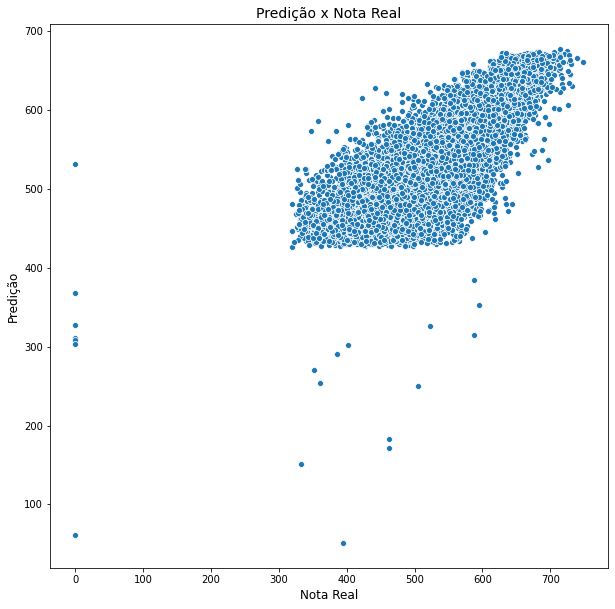

In [127]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = y_teste, y = predicoes)
plt.xlabel("Nota Real", fontsize = 12)
plt.ylabel("Predição", fontsize = 12)
plt.title("Predição x Nota Real", fontsize = 14)
plt.show()

No gráfico acima estamos comparando as notas que prevemos com as notas reais, entao quanto mais o gráfico se aproximar de uma reta, melhor é o modelo.

Vemos que para notas maiores, os pontos estão menos espalhados, o que pode indicar que o modelo obteve mais sucesso em acertar as notas maiores do que notas menores.

No gráfico abaixo, iremos comparar a nota de Linguagens com a de Matemática. Em azul temos a nota real e em laranja a nota que o modelo previu.

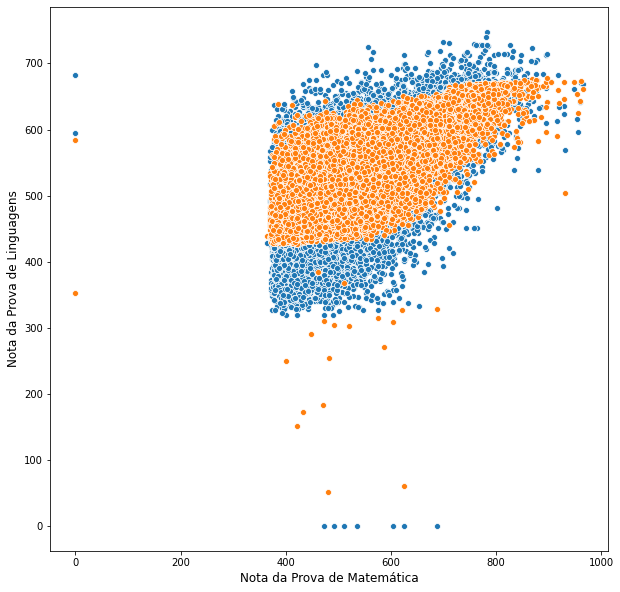

In [128]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = x_teste["NU_NOTA_MT"], y = y_teste)
sns.scatterplot(x = x_teste["NU_NOTA_MT"], y = predicoes)
plt.xlabel("Nota da Prova de Matemática", fontsize = 12)
plt.ylabel("Nota da Prova de Linguagens", fontsize = 12)
plt.show()

Neste caso, quanto mais os pontos laranjas coicidirem com os pontos azuis, melhor será o modelo. 

Vemos mais uma vez que nosso modelo previu melhor as notas maiores e superestimou as notas menores.